In [1]:
import zipfile
from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display
# loading the face detection classifier
face_cascade = cv.CascadeClassifier("D:\\anaconda3\Library\etc\haarcascades\haarcascade_frontalface_default.xml")

# the rest is up to you!

import zipfile
import io

In [2]:
from zipfile import ZipFile
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
zipfile_list = []
image_list = []
with ZipFile("C:\\Users\Sorby\Desktop\Personal Work\Python\small_img.zip") as zipped:
    zipped.extractall()
    zipfile_list = zipped.namelist()
for i in range(len(zipfile_list)):
    image_list.append(Image.open(zipfile_list[i]))#image_list has images

In [15]:
imgtext = []
for img in image_list:
    test_img = img.convert("L")
    for x in range(test_img.width):
        for y in range(test_img.height):
            if test_img.getpixel((x,y))< 128: 
                test_img.putpixel( (x,y), 0 )
            else:
                test_img.putpixel( (x,y), 255 )
    text = []
    text = pytesseract.image_to_string(test_img)
    imgtext.append(text)

In [16]:
cv_imgs = []
for i in range(4):
    cv_imgs.append(cv.imread(zipfile_list[i]))
#all images read by cv in cv_imgs

cv_grays = []
for i in range(4):
    cv_grays.append(cv.cvtColor(cv_imgs[i], cv.COLOR_BGR2GRAY))
#grayscaled images stored in cv_grays

In [17]:
keyword = input("Enter query: ")
found_in = []
for i in range(4):
    if keyword in imgtext[i]:
        found_in.append(i)

In [18]:
face_list = {}
for i in found_in:
    face_list[i] = face_cascade.detectMultiScale(cv_grays[i], 1.3, minNeighbors=7)

In [19]:
cropped = {}

dimension = {}
for i in found_in:
    min_w = 9999
    min_h = 9999    
    face_collection = []
    for x, y, w, h in face_list[i]:
        face_collection.append(image_list[i].crop((x, y, x+w, y+h)))
        if w < min_w and h < min_h:
            min_w = w
            min_h = h
    dimension[i] = (min_w, min_h)
    cropped[i] = face_collection

In [20]:
thumbnails = {}
for i in cropped.keys():
    img_thumbnail_set = []
    for j in cropped[i]:
        img_thumbnail_set.append(j)
    thumbnails[i] = img_thumbnail_set

In [21]:
for i in thumbnails.keys():
    for j in thumbnails[i]:
        j.thumbnail(dimension[i])
#thumbnails has all the cropped faces resized to same size

		******************* Search query was:  Mark  *******************


Results found in file  a-0.png


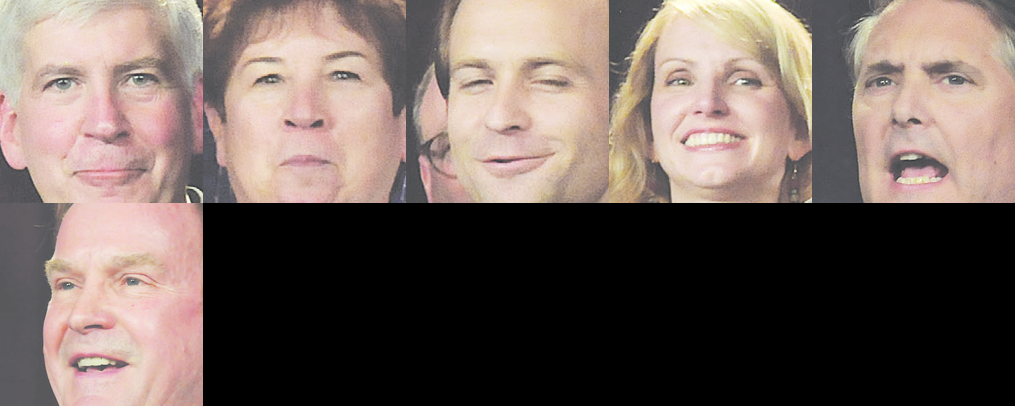

Results found in file  a-1.png


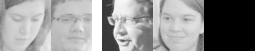

Results found in file  a-2.png


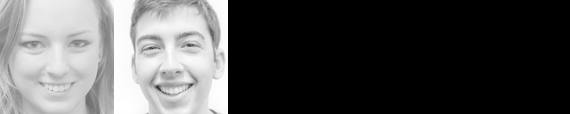

Results found in file  a-3.png


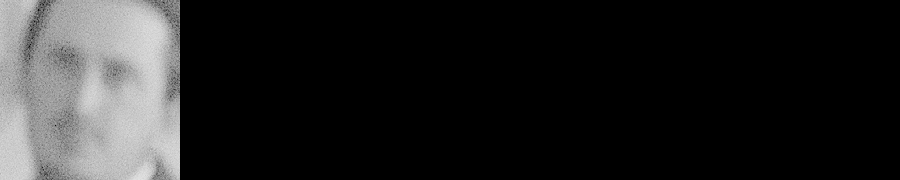

In [22]:
#cnc_sheet=Image.new(image_list[0].mode, ((min_w)*3,(min_h)*3))
print("\t\t******************* Search query was: ", keyword, " *******************\n\n")
for i in thumbnails.keys():
    row_mult = 1
    print("Results found in file ", zipfile_list[i])
    row_mult = len(thumbnails[i]) // 5
    cnc_sheet = Image.new(image_list[0].mode, (dimension[i][0]*5, dimension[i][1]*(row_mult+1)))
    xoffset = 0
    yoffset = 0
    for img in thumbnails[i]:
        cnc_sheet.paste(img, (xoffset, yoffset) )
        if xoffset+dimension[i][0] == cnc_sheet.width:
            xoffset=0
            yoffset=yoffset+dimension[i][1]
        else:
            xoffset=xoffset+dimension[i][0]
    display(cnc_sheet)